/mydrive


Mounted at /content/drive


/content/drive/My Drive/ComparisonPerfomanceCNN/galaxy-zoo


In [5]:
!pip install Augmentor

In [6]:
from string import Template
from zipfile import ZipFile
from os import path, mkdir, makedirs
import pandas as pd
from shutil import copy
import matplotlib.pyplot as plt
import numpy as np
import Augmentor
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import seaborn as sns

ImportError: cannot import name 'float_factorial' from 'scipy._lib._util' (C:\Users\Usuario\anaconda3\lib\site-packages\scipy\_lib\_util.py)

In [3]:
plt.style.use('seaborn')

COMPETITION_NAME = "galaxy-zoo-the-galaxy-challenge"
DATA_PATH = "/data/"


In [7]:
# For the classification of galaxies, the dataset provided by the galaxy challenge comes with 37 classes.
#
# To reduce the number of classes, we filter the classes we want and copy each class evenly
# your proper folder. We will only use images with response rates greater than 90%.
# - completely-rounded: Class7.1
# - in-between: 7.2
# - cigar-shaped: Class7.3
# - on-edge: Class2.1
# - spiral-barred: Class3.1 && Class4.1
# - spiral: Class3.2 && Class4.1

#%% Loading csv and adjusting the dataframe
original_training_data = pd.read_csv(DATA_PATH + "training_solutions_rev1.csv")

# Pandas read GalaxyID has float, converts it back to string.
original_training_data["GalaxyID"] = original_training_data["GalaxyID"].astype(str)

# Better column naming
columns_mapper = {
    "GalaxyID": "GalaxyID",
    "Class7.1": "completely_round",
    "Class7.2": "in_between",
    "Class7.3": "cigar_shaped",
    "Class2.1": "on_edge",
    "Class4.1": "has_signs_of_spiral",
    "Class3.1": "spiral_barred",
    "Class3.2": "spiral",
}

columns = list(columns_mapper.values())
galaxies_df = original_training_data.rename(columns=columns_mapper)[columns]
galaxies_df.set_index("GalaxyID", inplace=True)
galaxies_df.head(10)

,completely_round,in_between,cigar_shaped,on_edge,has_signs_of_spiral,spiral_barred,spiral
GalaxyID,,,,,,,
100008,0.201463,0.181684,0.000000,0.000000,0.418398,0.038452,0.578401
100023,0.000000,0.135082,0.191919,0.031178,0.591328,0.467370,0.165229
100053,0.000000,0.741864,0.023853,0.000000,0.000000,0.000000,0.177352
100078,0.408599,0.284778,0.000000,0.000000,0.189098,0.109493,0.129071
100090,0.494587,0.439252,0.000000,0.000000,0.000000,0.000000,0.000000
100122,0.066807,0.663691,0.008335,0.000000,0.000000,0.000000,0.238159
100123,0.388158,0.074334,0.000000,0.000000,0.000000,0.000000,0.456033
100128,0.482483,0.205300,0.000000,0.000000,0.000000,0.069098,0.219246
100134,0.010917,0.010917,0.000000,0.021751,0.546491,0.313077,0.642124


In [8]:
# ### Create DataFrames for each class
# %% Simple function to plot each class data

def plot_distribution(df, column):
    print("Items: " + str(df.shape[0]))
    sns.distplot(df[column])
    plt.xlabel("% Votes")
    plt.title('Distribution - ' + column)
    plt.show()

Items: 7000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


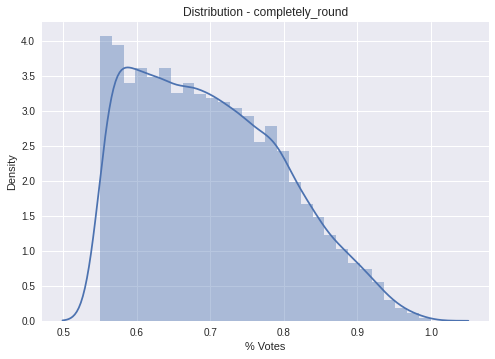

In [9]:
completely_round_df = galaxies_df.sort_values(by="completely_round", ascending=False)[0:7000]
completely_round_df["type"] = "completely_round"
completely_round_df = completely_round_df[["type", "completely_round"]]

plot_distribution(completely_round_df, "completely_round")

Items: 6000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


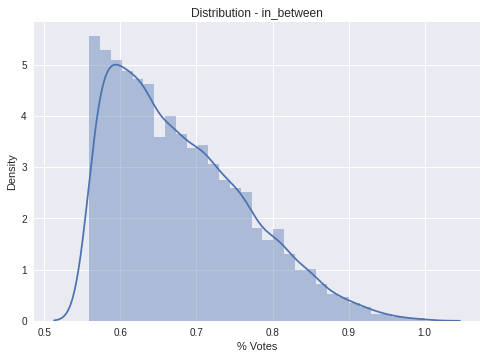

In [10]:
in_between_df = galaxies_df.sort_values(by="in_between", ascending=False)[0:6000]
in_between_df["type"] = "in_between"

# filters
bigger_than_completely_round = (
    in_between_df["in_between"] > in_between_df["completely_round"]
)
bigger_than_cigar_shaped = in_between_df["in_between"] > in_between_df["cigar_shaped"]

in_between_df = in_between_df[bigger_than_completely_round & bigger_than_cigar_shaped]
in_between_df = in_between_df[["type", "in_between"]]
plot_distribution(in_between_df, "in_between")

Items: 1304


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


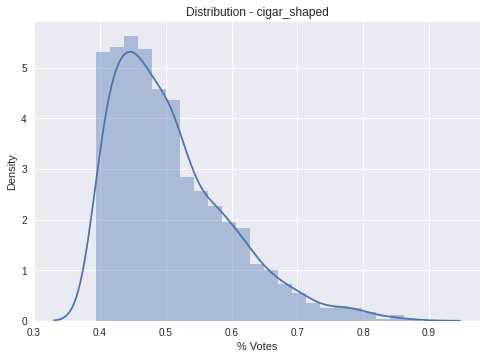

In [11]:
cigar_shaped_df = galaxies_df.sort_values(by="cigar_shaped", ascending=False)[0:1550]
cigar_shaped_df["type"] = "cigar_shaped"

# filters
bigger_than_in_between = cigar_shaped_df["cigar_shaped"] > cigar_shaped_df["in_between"]
bigger_than_on_edge = cigar_shaped_df["cigar_shaped"] > cigar_shaped_df["on_edge"]

cigar_shaped_df = cigar_shaped_df[bigger_than_in_between & bigger_than_on_edge]
cigar_shaped_df = cigar_shaped_df[["type", "cigar_shaped"]]

plot_distribution(cigar_shaped_df, "cigar_shaped")

Items: 5000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


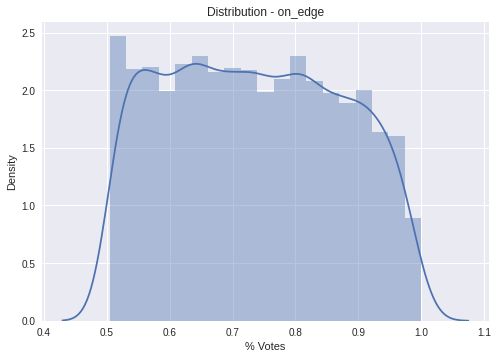

In [12]:
on_edge_df = galaxies_df.sort_values(by="on_edge", ascending=False)[0:5000]
on_edge_df["type"] = "on_edge"
on_edge_df = on_edge_df[["type", "on_edge"]]
plot_distribution(on_edge_df, "on_edge")

Items: 4183


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


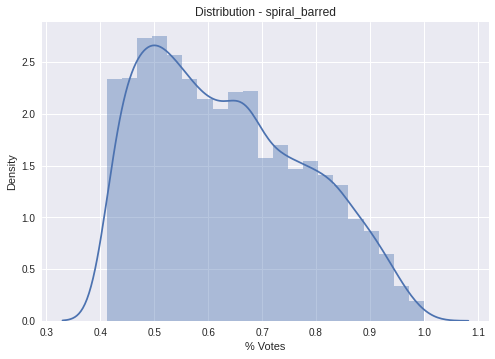

In [13]:
spiral_barred_df = galaxies_df.sort_values(
    by=["spiral_barred", "has_signs_of_spiral"], ascending=False
)[0:4500]

spiral_barred_filter = spiral_barred_df['spiral'] < spiral_barred_df['spiral_barred']
spiral_barred_df = spiral_barred_df[spiral_barred_filter]
spiral_barred_df["type"] = "spiral_barred"
spiral_barred_df = spiral_barred_df[["type", "spiral_barred"]]
plot_distribution(spiral_barred_df, "spiral_barred")

Items: 8000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


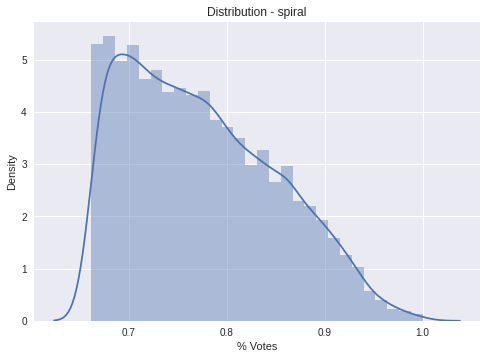

In [14]:
spiral_df = galaxies_df.sort_values(
    by=["spiral", "has_signs_of_spiral"], ascending=False
)[0:8000]
spiral_df["type"] = "spiral"
spiral_df = spiral_df[["type", "spiral"]]
plot_distribution(spiral_df, "spiral")

In [15]:
#%% Generate a single dataframe with all galaxies from each class
dfs = [
    completely_round_df,
    in_between_df,
    cigar_shaped_df,
    on_edge_df,
    spiral_barred_df,
    spiral_df,
]


# Merge and drop and possible duplicates
merged_dfs = pd.concat(dfs, sort=False)
merged_dfs.reset_index(inplace=True)
merged_dfs.drop_duplicates(subset="GalaxyID", inplace=True)
merged_dfs.head(5)

,GalaxyID,type,completely_round,in_between,cigar_shaped,on_edge,spiral_barred,spiral
0,585988,completely_round,1.000000,NaN,NaN,NaN,NaN,NaN
1,926649,completely_round,0.991909,NaN,NaN,NaN,NaN,NaN
2,123695,completely_round,0.990592,NaN,NaN,NaN,NaN,NaN
3,802922,completely_round,0.986673,NaN,NaN,NaN,NaN,NaN
4,950850,completely_round,0.983977,NaN,NaN,NaN,NaN,NaN


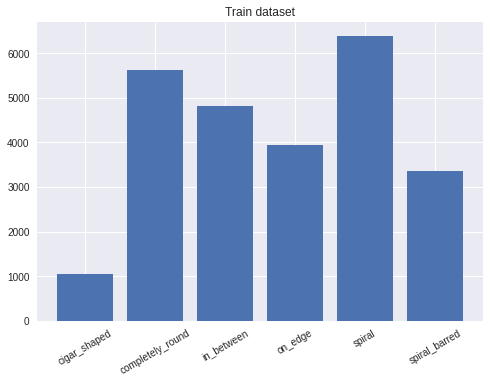

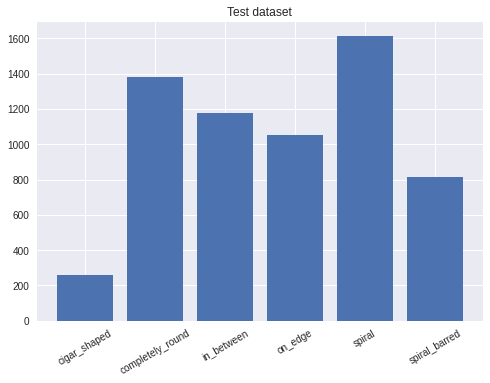

In [16]:
# Split the datafrane between train and test
train_df, validation_df = train_test_split(merged_dfs, test_size=0.2)
#%% plot distribuition
def plot_info_set(df, name):
    countings = df.groupby("type").count().to_dict()["GalaxyID"]
    labels = list(countings.keys())
    values = list(countings.values())
    index = np.arange(len(labels))
    plt.bar(index, values)
    plt.title(name)
    plt.xticks(index, labels, rotation=30)
    plt.show()


plot_info_set(train_df, "Train dataset")
plot_info_set(validation_df, "Test dataset")


Augment

In [17]:
ZOOM_FACTOR=1.6
DIMEN=70
FILTERED_DATA_PATH = "/data/filtered/"
DATASETS_PATH = "/data/sets/"

In [18]:
def copy_files_of_set(df, dataset):
    print("Copying filtered files of " + dataset)
    if path.isdir(FILTERED_DATA_PATH + dataset) is False:
        makedirs(FILTERED_DATA_PATH + dataset, exist_ok=True)

    src_path = Template(DATA_PATH + "images_training/images_training_rev1/$name.jpg")

    for index, image in df.iterrows():
        dest_path = FILTERED_DATA_PATH + dataset + '/' + image['type']
        source_img = src_path.substitute(name=image["GalaxyID"])

        if path.isdir(dest_path) is False:
            mkdir(dest_path)

        copy(source_img, dest_path)

In [ ]:
copy_files_of_set(train_df, "training")
copy_files_of_set(validation_df, "validation")

Copying filtered files of training


In [ ]:
def resize_and_zoom(dataset):
    p = Augmentor.Pipeline(FILTERED_DATA_PATH + dataset, DATASETS_PATH + dataset)
    p.zoom(probability=1, max_factor=ZOOM_FACTOR, min_factor=ZOOM_FACTOR)
    p.resize(probability=1, width=DIMEN, height=DIMEN)
    p.process()
    
def augment_set(n, dataset = ""):
    p = Augmentor.Pipeline(FILTERED_DATA_PATH + "training/" + dataset, DATASETS_PATH + "training/" + dataset)
    p.zoom(probability=1, max_factor=ZOOM_FACTOR, min_factor=ZOOM_FACTOR)
    p.rotate_random_90(probability=0.2)
    p.flip_top_bottom(probability=0.5)
    p.flip_left_right(probability=0.5)
    p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.5)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.8)
    p.resize(probability=1, width=DIMEN, height=DIMEN)
    p.sample(n)

In [ ]:
resize_and_zoom("training")
resize_and_zoom("validation")
# augment_set(2500, "cigar_shaped")
# augment_set(1500, "spiral_barred")
augment_set(n = 15000)

**Train**